In [47]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py

In [60]:
df = pd.read_csv\
('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/max_dataframe_cut.csv')

In [61]:
df.head()

,Unnamed: 0,start_timestamp,frame,actual_timestamp,area,probability
0,10,1573061868,648,1573061911,276490,0.988503
1,32,1573830164,72,1573830168,207648,0.995947
2,45,1573830164,1518,1573830265,294148,0.969995
3,64,1573830554,72,1573830558,103700,0.983073
4,70,1573830554,190,1573830566,122512,0.977682


In [67]:
df.iloc[0]['start_timestamp']

1573061868.0

In [50]:
def show_frame(video_file, frame_number):
    vid_obj = cv2.VideoCapture(video_file)
    vid_obj.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    res, frame = vid_obj.read()
    if res:
        cropped_frame = frame[200:850, 1100:1750]
        return cropped_frame
    else:
        return False

In [51]:
test_img_arr = [np.asarray(show_frame('/green-projects/project-sonyc_redhook/workspace/share/original_video/' \
               + str(int(df.iloc[x]['start_timestamp'])) + '.ts', df.iloc[x]['frame']).tolist()) for x in df.index[:10]]

In [52]:
# show_frame('/green-projects/project-sonyc_redhook/workspace/share/original_video/' \
#                + str(int(df.iloc[0]['start_timestamp'])) + '.ts', df.iloc[0]['frame']).tolist()

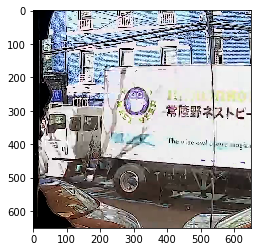

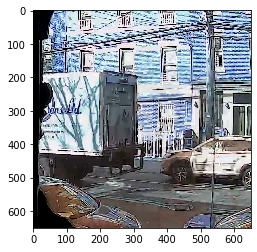

In [53]:
for x in test_img_arr[4:6]:
    plt.imshow(x)
    plt.show()

In [54]:
len(test_img_arr)

10

In [69]:
test_img_arr[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [179, 183, 217],
        [160, 162, 196],
        [144, 146, 180]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [236, 240, 255],
        [215, 217, 251],
        [188, 190, 224]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [213, 219, 255],
        [227, 230, 255],
        [214, 217, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
img_arr = [show_frame('/green-projects/project-sonyc_redhook/workspace/share/original_video/' \
               + str(int(df.iloc[x]['start_timestamp'])) + '.ts', df.iloc[x]['frame']) for x in df.index]

In [70]:
h5 = h5py.File\
('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/max_img.hdf5', 'r')

In [80]:
list(h5.keys())

['max_img']

In [2]:
def annotate_img(img, annotation_list):
    #display img
    plt.imshow(img)
    plt.show()
    #truck or no?
    annotation = input("Press y if the image shows a truck, and n if not: ")
    #add answer to annotation_list
    annotation_list.append(annotation)

In [3]:
test_annotation_list = []

In [4]:
# for i in test_img_arr[:20]:
#     annotate_img(i, test_annotation_list)

In [82]:
max_img = h5['max_img']

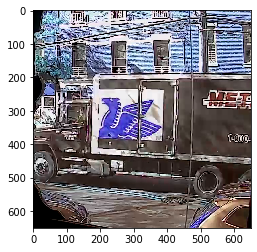

In [98]:
plt.imshow(max_img[0][5])